# Hotel Reviews for Sentiment Analysis.
#### By : Hala Alenazi & Aishah Alanazi & yaqeen Alhawaj & Hussain Alsultan & Shaikha Alotaibi .
____________

## Project Scope

Build unsupervised Natural Language Processing (NLP) machine learning models that decide whether a text review is positive review or negative review. This project, will help hotels to determine the category of text review and cluster them automaticity to improve their services.

## Data Description

After we obtained the datasets these are the features used:



- **Hotel_Address**: Address of hotel.
- **Review_Date**: Date when reviewer posted the corresponding review.
- **Average_Score**: Average Score of the hotel, calculated based on the latest comment in the last year.
- **Hotel_Name**: Name of Hotel
- **Reviewer_Nationality**: Nationality of Reviewer
- **Negative_Review**: Negative Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Negative'
- **ReviewTotalNegativeWordCounts**: Total number of words in the negative review.
- **Positive_Review**: Positive Review the reviewer gave to the hotel. If the reviewer does not give the negative review, then it should be: 'No Positive'
- **ReviewTotalPositiveWordCounts**: Total number of words in the positive review.
- **Reviewer_Score**: Score the reviewer has given to the hotel, based on his/her experience
- **TotalNumberofReviewsReviewerHasGiven**: Number of Reviews the reviewers has given in the past.
- **TotalNumberof_Reviews**: Total number of valid reviews the hotel has.
- **Tags**: Tags reviewer gave the hotel.
- **dayssincereview**: Duration between the review date and scrape date.
- **AdditionalNumberof_Scoring**: There are also some guests who just made a scoring on the service rather than a review. This number indicates how many valid scores without review in there.
- **lat**: Latitude of the hotel
- **lng**: longtitude of the hotel


In [1]:
! python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
! pip install autocorrect

In [3]:
! pip install corextopic

## Data Libraries

In [4]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import spacy
from spacy.lang.en.examples import sentences 
import csv
import nltk
import matplotlib.pyplot as plt
import warnings
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, SpectralClustering, MeanShift
from sklearn.decomposition import PCA,TruncatedSVD,NMF
from sklearn import svm
from sklearn.feature_extraction import text
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, roc_auc_score, roc_curve,confusion_matrix, f1_score
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from autocorrect import Speller
from matplotlib import pyplot as plt
from corextopic import corextopic as ct
from corextopic import vis_topic as vt
from collections import Counter,Counter,defaultdict
from scipy.linalg import svd
from sklearn.tree import DecisionTreeClassifier
spell = Speller(lang='en')
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")

## Load Dataset 

In [5]:
# Read the 'Hotel_Reviews.csv' dataset into an object named 'df'.

df = pd.read_csv('Hotel_Reviews.CSV')

In [6]:
# Shows the number of rows and columns in the data

df.shape

(515738, 17)

In [7]:
#General information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

## Exploratory Analysis

In [8]:
# How many hotels do we have in the dataset?
# What is the hotel with most reviews?

df['Hotel_Name'].describe()

count                                         515738
unique                                          1492
top       Britannia International Hotel Canary Wharf
freq                                            4789
Name: Hotel_Name, dtype: object

We have 1492 different hotels in the dataset and the most frequent one have the major is the Britannia International Hotel Canary Wharf with 4789 reviews.

In [9]:
# How many reviews do we have for each one of the reviewed hotels?

# with .value_counts() we count the number of occurencies for each one of the used values.
df['Hotel_Name'].value_counts().head(20)

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
Grand Royale London Hyde Park                        2958
Holiday Inn London Kensington                        2768
Hilton London Metropole                              2628
Millennium Gloucester Hotel London                   2565
Intercontinental London The O2                       2551
Park Grand Paddington Court                          2288
Hilton London Wembley                                2227
Park Plaza County Hall London                        2223
Blakemore Hyde Park                                  2178
Park Plaza London Riverbank                          2167
M by Montcalm Shoreditch London Tech City            2155
DoubleTree by Hilton London Docklands Riverside      2147
St James Court

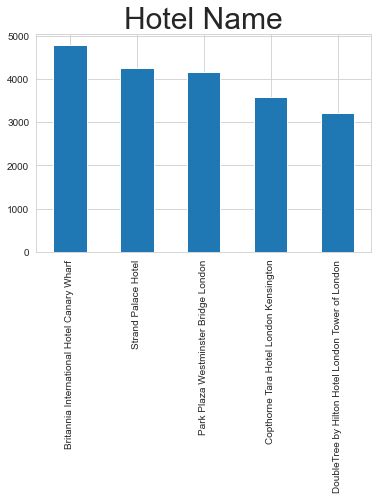

In [10]:
df['Hotel_Name'].value_counts().head(5).plot(kind='bar');
plt.title('Hotel Name',fontsize= 30);
plt;

In [11]:
# How is the nationality of the reviewers distribitued?
df['Reviewer_Nationality'].value_counts().head(20)

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
 Saudi Arabia                   8951
 Netherlands                    8772
 Switzerland                    8678
 Germany                        7941
 Canada                         7894
 France                         7296
 Israel                         6610
 Italy                          6114
 Belgium                        6031
 Turkey                         5444
 Kuwait                         4920
 Spain                          4737
 Romania                        4552
 Russia                         3900
 South Africa                   3821
Name: Reviewer_Nationality, dtype: int64

We've noticed that a lot of the reviews are from United Kingdom people.

<AxesSubplot:xlabel='Average_Score', ylabel='count'>

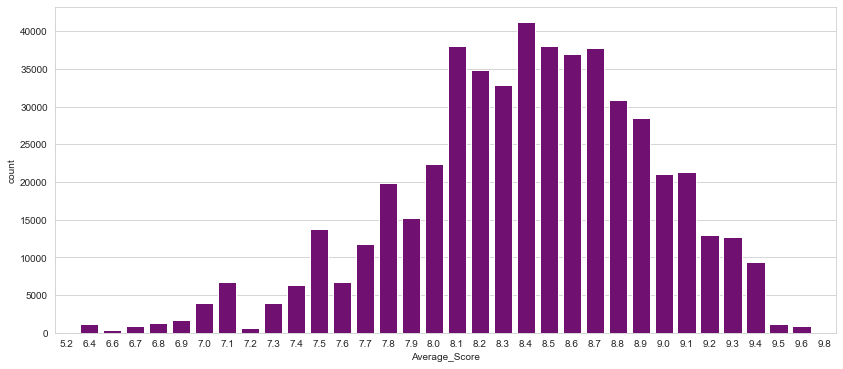

In [12]:
# Plotting the Average scores of the hotels
df[['Hotel_Name','Average_Score']].drop_duplicates() # Dropping any duplicates
plt.figure(figsize = (14,6))
sns.countplot(x = 'Average_Score',data = df,color = 'purple')

# From the graph below, we can notice that most hotels were given scores ranging from 8.1 to 8.9

<AxesSubplot:title={'center':'Hotel distribution in European countries'}>

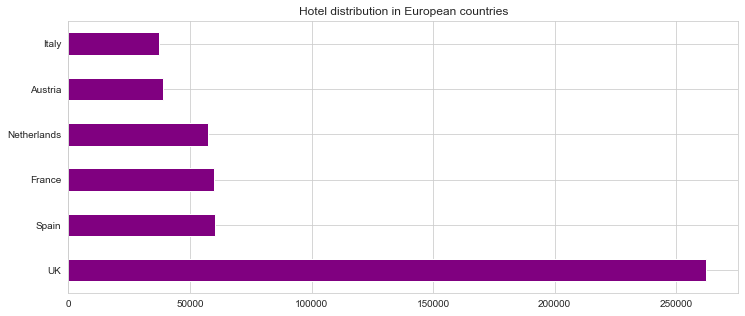

In [13]:
# We check out the distribution of hotels in the European countries
df.Hotel_Address = df.Hotel_Address.str.replace('United Kingdom','UK') # Replacing 'united kingdom' with 'UK' for easy use
df['EC'] = df.Hotel_Address.apply(lambda x: x.split(' ')[-1]) # Splitting the hotel address and picking out the last string which would be the countries
#Plotting with matplotlib 
plt.figure(figsize = (12,5))
plt.title('Hotel distribution in European countries')
df.EC.value_counts().plot.barh(color = 'purple')

### Feature Engineering: acquiring countries column from hotel addresses column:

In [14]:
def get_contries():
    df['Country'] = df.Hotel_Address.apply(lambda x: str(x).split(" ")[-1])
    df['Country'] = df['Country'].str.replace('UK','United Kingdom')
get_contries()

In [15]:
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,EC,Country
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Netherlands,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Netherlands,Netherlands
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,Netherlands,Netherlands
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,Netherlands,Netherlands


In [16]:
df['Country'].unique()

array(['Netherlands', 'United Kingdom', 'France', 'Spain', 'Italy',
       'Austria'], dtype=object)

In [17]:
df['Country'].value_counts()

United Kingdom    262301
Spain              60149
France             59928
Netherlands        57214
Austria            38939
Italy              37207
Name: Country, dtype: int64

By dividing data into two parts, positive reviews and negative reviews:

In [18]:
df_pos = df[['Positive_Review','Hotel_Name','Country','Reviewer_Score','Reviewer_Nationality']]
df_neg = df[['Negative_Review','Hotel_Name','Country','Reviewer_Score','Reviewer_Nationality']]
df_recom = df[['Reviewer_Nationality','Hotel_Name','Reviewer_Score']]

By renaming columns from ('Positive_Review''Negative_Review') to Review

In [19]:
df_pos.rename(columns = {'Positive_Review':'Review'},inplace= True)
df_neg.rename(columns = {'Negative_Review':'Review'},inplace= True)

Establishing new Column named Sentiment and assigning 1 to positive review and 0 to negative review

In [20]:
df_pos['Sentiment'] = 1
df_neg['Sentiment'] = 0
df_all = pd.concat([df_pos,df_neg],ignore_index=True)
df_drop = df_all.drop_duplicates()

Data contain non-english letters. code below removes all non-english reviews

In [21]:
df_drop = df_drop[df_drop['Review'].map(lambda x: x.isascii())]

Additional data cleaning by removing punctuation, repeated_chars and so on....

In [22]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())
repeated_chars = lambda x: re.sub('(.)\\1{2,}', '\\1', x)
df_drop['Review'] = df_drop.Review.map(alphanumeric).map(punc_lower).map(repeated_chars)
df_drop


,Review,Hotel_Name,Country,Reviewer_Score,Reviewer_Nationality,Sentiment
0,only the park outside of the hotel was beauti...,Hotel Arena,Netherlands,2.9,Russia,1
1,no real complaints the hotel was great great ...,Hotel Arena,Netherlands,7.5,Ireland,1
2,location was good and staff were ok it is cut...,Hotel Arena,Netherlands,7.1,Australia,1
3,great location in nice surroundings the bar a...,Hotel Arena,Netherlands,3.8,United Kingdom,1
4,amazing location and building romantic setting,Hotel Arena,Netherlands,6.7,New Zealand,1
...,...,...,...,...,...,...
1031471,no trolly or staff to help you take the lugga...,Atlantis Hotel Vienna,Austria,7.0,Kuwait,0
1031472,the hotel looks like but surely not,Atlantis Hotel Vienna,Austria,5.8,Estonia,0
1031473,the ac was useless it was a hot week in vienn...,Atlantis Hotel Vienna,Austria,2.5,Egypt,0
1031474,no negative,Atlantis Hotel Vienna,Austria,8.8,Mexico,0


Calling the spell checker library to check for any spelling mistakes automatically 

In [23]:
from autocorrect import Speller

spell = Speller(lang='en')

Sample Original Data

In [24]:
data_sample = df_drop.sample(100000,random_state=2021)
data_sample['Review'] = data_sample['Review'].map(lambda x: spell(x))

# Save as csv
data_sample.to_csv('hotel_reviews_sample_2021.csv')

In [25]:
data_sample

,Review,Hotel_Name,Country,Reviewer_Score,Reviewer_Nationality,Sentiment
198260,friendly staff good service overall clean rooms,Radisson Blu Edwardian New Providence Wharf,United Kingdom,9.6,United Kingdom,1
378853,no positive,Leonardo Hotel Vienna,Austria,8.3,Romania,1
602911,very iverpriced,First Hotel Paris Tour Eiffel,France,5.0,Australia,0
746579,room was very dated and cramped not exactly r...,Radisson Blu Edwardian Vanderbilt,United Kingdom,9.6,United Kingdom,0
939234,no sauna,Golden Tulip Amsterdam Riverside,Netherlands,7.9,United Kingdom,0
...,...,...,...,...,...,...
425668,bed was large and comfortable rooms were basi...,Ilunion Barcelona,Spain,7.9,United Kingdom,1
623105,pool not open gym not open terrace bar not op...,Montcalm Royal London House City of London,United Kingdom,5.0,United Kingdom,0
27847,bed location,The Grosvenor,United Kingdom,9.2,Netherlands,1
669263,that i don t live at the hotel,Courthouse Hotel Shoreditch,United Kingdom,9.6,,0


Tokenization, Lemmatization reviews

In [26]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

data_sample['text_lemmatized'] = data_sample.Review.apply(lemmatize_text)

In [27]:
data_sample['Joined_text_lemmatize'] =  data_sample['text_lemmatized'].apply(lambda x: ' '.join(x))

In [28]:
nlp = spacy.load('en_core_web_sm')
data_sample['spacy_doc'] = list(nlp.pipe(data_sample.Joined_text_lemmatize))
data_sample

,Review,Hotel_Name,Country,Reviewer_Score,Reviewer_Nationality,Sentiment,text_lemmatized,Joined_text_lemmatize,spacy_doc
198260,friendly staff good service overall clean rooms,Radisson Blu Edwardian New Providence Wharf,United Kingdom,9.6,United Kingdom,1,"[friendly, staff, good, service, overall, clea...",friendly staff good service overall clean room,"(friendly, staff, good, service, overall, clea..."
378853,no positive,Leonardo Hotel Vienna,Austria,8.3,Romania,1,"[no, positive]",no positive,"(no, positive)"
602911,very iverpriced,First Hotel Paris Tour Eiffel,France,5.0,Australia,0,"[very, iverpriced]",very iverpriced,"(very, iverpriced)"
746579,room was very dated and cramped not exactly r...,Radisson Blu Edwardian Vanderbilt,United Kingdom,9.6,United Kingdom,0,"[room, wa, very, dated, and, cramped, not, exa...",room wa very dated and cramped not exactly rom...,"(room, wa, very, dated, and, cramped, not, exa..."
939234,no sauna,Golden Tulip Amsterdam Riverside,Netherlands,7.9,United Kingdom,0,"[no, sauna]",no sauna,"(no, sauna)"
...,...,...,...,...,...,...,...,...,...
425668,bed was large and comfortable rooms were basi...,Ilunion Barcelona,Spain,7.9,United Kingdom,1,"[bed, wa, large, and, comfortable, room, were,...",bed wa large and comfortable room were basic b...,"(bed, wa, large, and, comfortable, room, were,..."
623105,pool not open gym not open terrace bar not op...,Montcalm Royal London House City of London,United Kingdom,5.0,United Kingdom,0,"[pool, not, open, gym, not, open, terrace, bar...",pool not open gym not open terrace bar not ope...,"(pool, not, open, gym, not, open, terrace, bar..."
27847,bed location,The Grosvenor,United Kingdom,9.2,Netherlands,1,"[bed, location]",bed location,"(bed, location)"
669263,that i don t live at the hotel,Courthouse Hotel Shoreditch,United Kingdom,9.6,,0,"[that, i, don, t, live, at, the, hotel]",that i don t live at the hotel,"(that, i, don, t, live, at, the, hotel)"


## Topic Modeling
### Positive and Negative Reviews

In [29]:
#Positive = ('excellent' , 'amazing' , 'lovely' , 'spacious' , 'friendly' , 'quiet' , "fantastic" , "perfect" , "helpful", "modern" , "beautiful", "comfortable", "loved", "station")
#Negative = ("poor", "noisy", "bit", "expensive", "work", "should", "told", "wasn", "bad", "didn","did", "said", "asked", "noise")

positive_reviews = data_sample[data_sample.Sentiment==1]
negative_reviews = data_sample[data_sample.Sentiment==0]

In [30]:
sam_pos_df = positive_reviews.copy()
sam_neg_df = negative_reviews.copy()

In [31]:
sam_pos_df['Review'] = sam_pos_df['Review'].str.replace("hotel" , "")
sam_neg_df['Review'] = sam_neg_df['Review'].str.replace("hotel" , "")

### WordCloud for Positive Reviews:

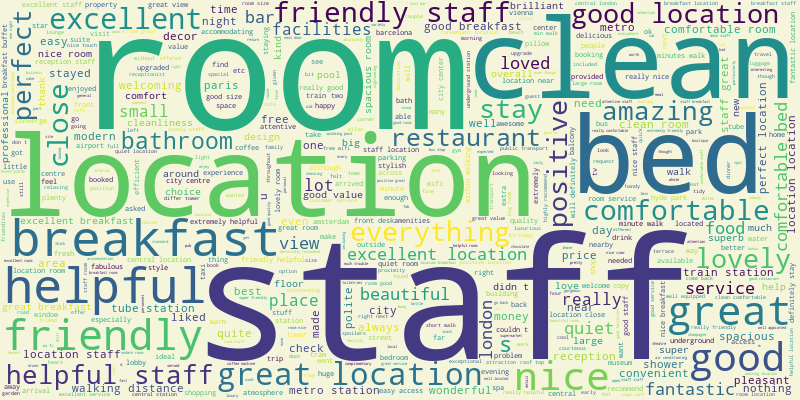

In [32]:
from wordcloud import WordCloud

long_string = ','.join(list(sam_pos_df['Review'].values))
wordcloud = WordCloud(background_color="beige", max_words=500, contour_width=3, contour_color='steelblue', width=800, height=400)
wordcloud.generate(long_string)
wordcloud.to_image()

### WordCloud for Negative Reviews:

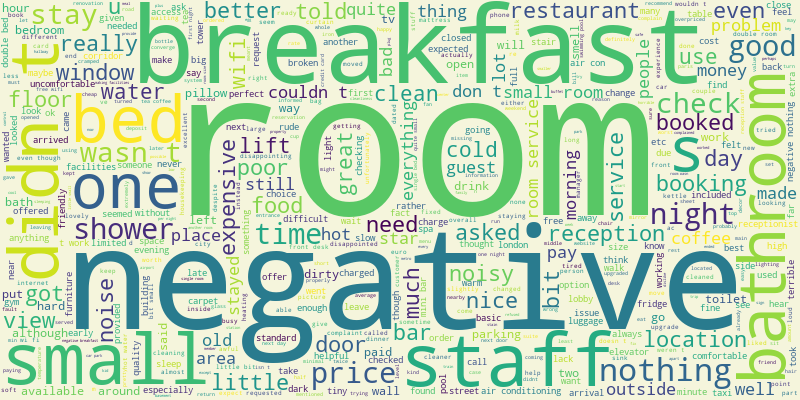

In [33]:
long_string = ','.join(list(sam_neg_df['Review'].values))
wordcloud = WordCloud(background_color="beige", max_words=500, contour_width=3, contour_color='steelblue', width=800, height=400)
wordcloud.generate(long_string)
wordcloud.to_image()

### Explore Adjs and Nouns in Reviews

In [34]:
pos_adj = [token.text.lower() for doc in positive_reviews.spacy_doc for token in doc if token.pos_ =='ADJ']############
neg_adj = [token.text.lower() for doc in negative_reviews.spacy_doc for token in doc if token.pos_=='ADJ']

pos_noun = [token.text.lower() for doc in positive_reviews.spacy_doc for token in doc if token.pos_=='NOUN']
neg_noun = [token.text.lower() for doc in negative_reviews.spacy_doc for token in doc if token.pos_ == 'NOUN']

In [35]:
# count the most common words in positive adjectives 
pos_adj=Counter(pos_adj)

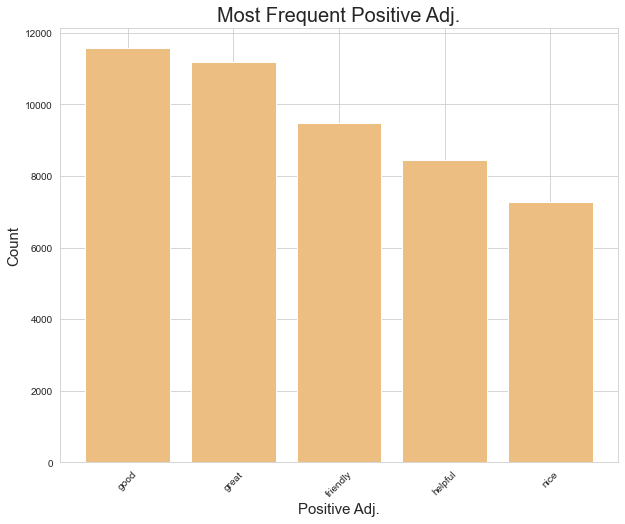

In [36]:
fre_p=FreqDist(pos_adj)
fre_p.most_common()
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
plt.xlabel('Positive Adj.', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Positive Adj.', fontsize=20)
for k, v in fre_p.most_common(5):
    plt.bar(k,v, color='#ECBE81')

In [37]:
# count the most common words in negative adjectives 
neg_adj=Counter(neg_adj)

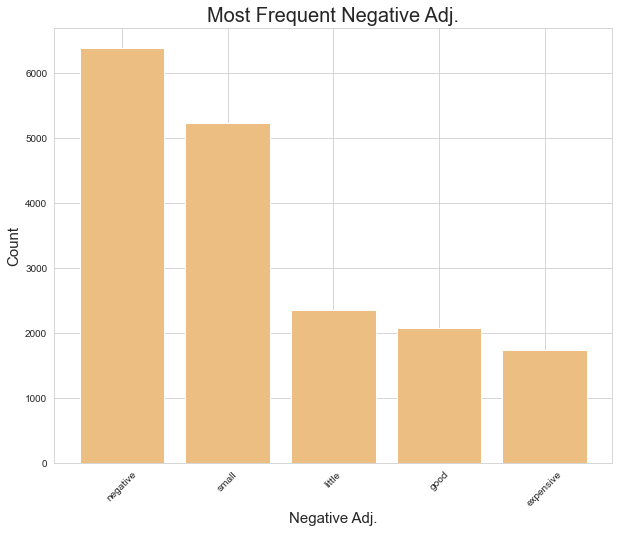

In [38]:
fre_n=FreqDist(neg_adj)
fre_n.most_common()
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
plt.xlabel('Negative Adj.', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Negative Adj.', fontsize=20)
for k, v in fre_n.most_common(5):
    plt.bar(k,v, color='#ECBE81')

In [39]:
# count the most common words in positive nouns 
pos_nouns=Counter(pos_noun)

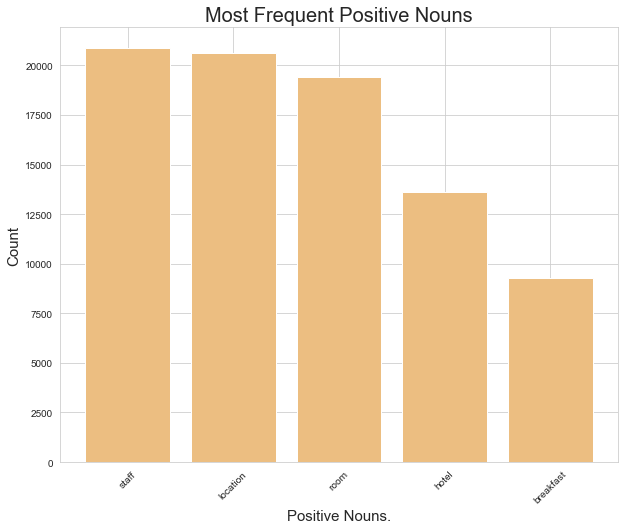

In [40]:
fre_pn=FreqDist(pos_nouns)
fre_pn.most_common()
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
plt.xlabel('Positive Nouns.', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Positive Nouns', fontsize=20)
for k, v in fre_pn.most_common(5):
    plt.bar(k,v, color='#ECBE81')

In [41]:
# count the most common words in negative nouns 
neg_nouns=Counter(neg_noun)

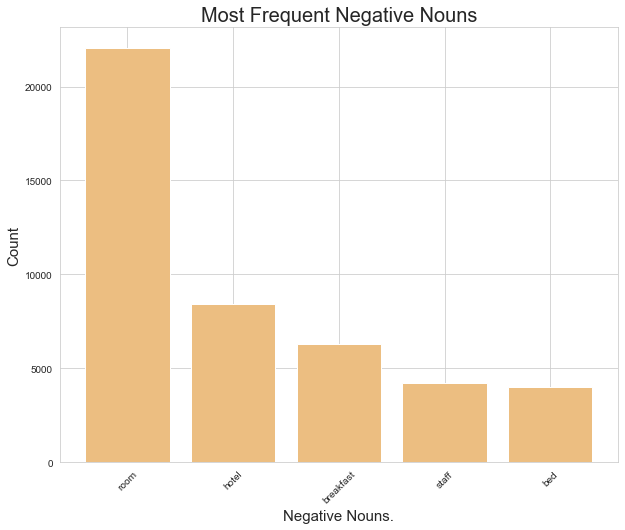

In [42]:
fre_nn=FreqDist(neg_nouns)
fre_nn.most_common()
plt.figure(figsize=(10,8))
plt.xticks(rotation=45)
plt.xlabel('Negative Nouns.', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Most Frequent Negative Nouns', fontsize=20)
for k, v in fre_nn.most_common(5):
    plt.bar(k,v, color='#ECBE81')

In [43]:
ENGLISH_STOP_WORDS = stopwords.words('english')

taking stop words from stopwords library and adding extra stop words:

In [44]:
stop_words = text.ENGLISH_STOP_WORDS.union(['didnt','did','havent', 'week', 'hi','wa','ha','day','today','really','also',
                                            'go', 'us', 'dont', 'got', 'im', 'ive','burger','food' ,'came', 'back',
                                           'get','try', 'would', 'time','good','great','service','didn','definitely','hotel','went','took','left',
                                            'check','told','asked','like','don','wasn','hotels','just','don','said','people','ve','stay','stayed',
                                           'loved','com','night','birthday','free','touch','little','given','making','hear','recommend','card','make',
                                           'feel','days','differ','thier','couldn','breakfast'])

In [45]:
vectorizer = CountVectorizer(stop_words=set(stop_words))##############################################################
doc_word = vectorizer.fit_transform(positive_reviews['Joined_text_lemmatize'])
doc_word.shape

(53634, 10122)

In [46]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [47]:
example = positive_reviews['Joined_text_lemmatize']

### LSA Topic

In [48]:
lsa = TruncatedSVD(3)
doc_topic = lsa.fit_transform(doc_word)
lsa.explained_variance_ratio_

array([0.05952131, 0.04615817, 0.03704756])

In [49]:
display_topics(lsa, vectorizer.get_feature_names(),10)

# 0 Hotel services
# 1 Room services 
# 2 Hotel Location



Topic  0
room, staff, location, friendly, helpful, clean, nice, comfortable, excellent, bed

Topic  1
room, bed, comfortable, clean, nice, bathroom, spacious, view, big, small

Topic  2
location, excellent, station, perfect, close, central, walk, near, tube, nice


### NMF Topic

In [50]:
nmf_model = NMF(4)
doc_topic = nmf_model.fit_transform(doc_word)

In [51]:
display_topics(nmf_model, vectorizer.get_feature_names(), 10)


# 0 Staff service
# 1 Room description 
# 2 location 
# 3 Transportion 


Topic  0
staff, friendly, helpful, excellent, lovely, clean, reception, extremely, comfortable, amazing

Topic  1
room, comfortable, clean, bed, lovely, bathroom, spacious, view, quiet, small

Topic  2
location, excellent, perfect, station, close, central, walk, near, tube, london

Topic  3
nice, station, close, restaurant, bed, walk, metro, area, minute, clean


In [52]:
Vt = pd.DataFrame(doc_topic.round(5),
             index = example,
             columns = ["Room_Condition","Staff",'Station','Area'])
Vt

,Room_Condition,Staff,Station,Area
Joined_text_lemmatize,,,,
friendly staff good service overall clean room,0.08712,0.08852,0.00000,0.00000
no positive,0.00004,0.00005,0.00007,0.00006
the design are beautiful staff are friendly atmosphere is comfortable good location,0.08836,0.01199,0.08519,0.00000
the bed wa super pillow were fab great night s sleep,0.00209,0.01566,0.00000,0.01183
everything wa perfect,0.00076,0.00210,0.00672,0.00000
...,...,...,...,...
no positive,0.00004,0.00005,0.00007,0.00006
very pleasant surprised with this hotel room are so comfortable clean and modern we felt a if we got a lot for the price despite being in a busy area gothic quarter we were never disturbed by street noise we were literally facing barcelona cathedral a soon a we stepped outside the hotel what a beautiful view every morning the pool area on the top floor is also a lovely little outdoor space with nice view loved our stay here,0.00889,0.13816,0.00206,0.13416
a modern hotel in a very central location with wonderful stuff,0.00000,0.00262,0.09120,0.00106


## Corecx Topic

### Topicing on Positive Reviews

In [53]:
vectorizer = CountVectorizer(ngram_range=(1,2),max_features=2000,
                            stop_words=set(stop_words),token_pattern='\\b[a-z][a-z]+\\b',
                            binary=True)
doc_word = vectorizer.fit_transform(positive_reviews['Review'])
words = list(np.asarray(vectorizer.get_feature_names()))

In [54]:
topic_model = ct.Corex(n_hidden=3, words=words, seed=1)
topic_model.fit(doc_word, words=words, docs=positive_reviews)
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))
    
    
# 0 Transportion
# 1 Room service
# 2 staff service

0: station,close,walk,metro,walking,restaurants,tube,distance,near,walking distance
1: room,comfortable,clean,bed,rooms,spacious,bathroom,nice,size,room clean
2: staff,friendly,helpful,staff friendly,friendly staff,friendly helpful,staff helpful,helpful staff,positive,location staff


### Topicing on Negative Reviews

In [55]:
vectorizer = CountVectorizer(ngram_range=(1,3),max_features=2000,
                            stop_words= stop_words ,token_pattern='\\b[a-z][a-z]+\\b',
                            binary=True)
doc_word = vectorizer.fit_transform(negative_reviews['Review'])
words = list(np.asarray(vectorizer.get_feature_names()))

In [56]:
topic_model = ct.Corex(n_hidden=5, words=words, seed=1)
topic_model.fit(doc_word, words=words, docs=negative_reviews)
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))
    

# 0 Room Service
# 1 Receptionist 
# 2 Transportation 
# 3 Facilities 
# 4 Room size 

0: room,small,negative,bathroom,rooms,room small,air,window,floor,noisy
1: staff,reception,rude,morning,helpful,friendly,pay,desk,early,receptionist
2: door,booked,far,booking,walk,city,minutes,station,arrived,away
3: water,coffee,bar,tea,shower,tea coffee,facilities,mini,money,bath
4: bed,double,size,beds,tiny,single,uncomfortable,comfortable,hard,double bed


## Clustring

In [58]:
def cluster(df):
    for i in df:
        lat = i['lat'].unique()
        lng = i['lng'].unique()
        loc = []
        for f, b in zip(lat, lng):
            loc.append([f,b])
        confert =pd.DataFrame(loc)
        confert.dropna(inplace=True)
        lat = confert[0].tolist()
        lng = confert[1].tolist()
        loc = []
        for f, b in zip(lat,lng):
            loc.append([f,b])

        X = StandardScaler().fit_transform(loc)
        db = DBSCAN(eps=0.15, min_samples=3).fit(X)

        # Let's find the observations DBSCAN called "core"
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

        unique_labels = set(labels)
        colors = plt.cm.rainbow(np.linspace(0, 1, len(unique_labels)))
        plt.figure(dpi=200)
        show_core = True
        show_non_core = True
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Black used for noise.
                col = 'k'

            class_member_mask = (labels == k)
            if show_core:
                xy = X[class_member_mask & core_samples_mask]
                x, y = xy[:,0], xy[:,1]
                plt.scatter(x, y, c=col, edgecolors='k',  s=20, linewidths=1.1) # add black border for core points

            if show_non_core:
                xy = X[class_member_mask & ~core_samples_mask]
                x, y = xy[:,0], xy[:,1]
                plt.scatter(x, y, c=col, s=20, linewidths=1.1)

        plt.title('Estimated number of clusters: %d' % n_clusters_);

In [59]:
list_of_country_df = []
for i in range(len(df['Country'].value_counts().index)):
    list_of_country_df.append(df[(df["Country"] == df['Country'].value_counts().index[i])])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

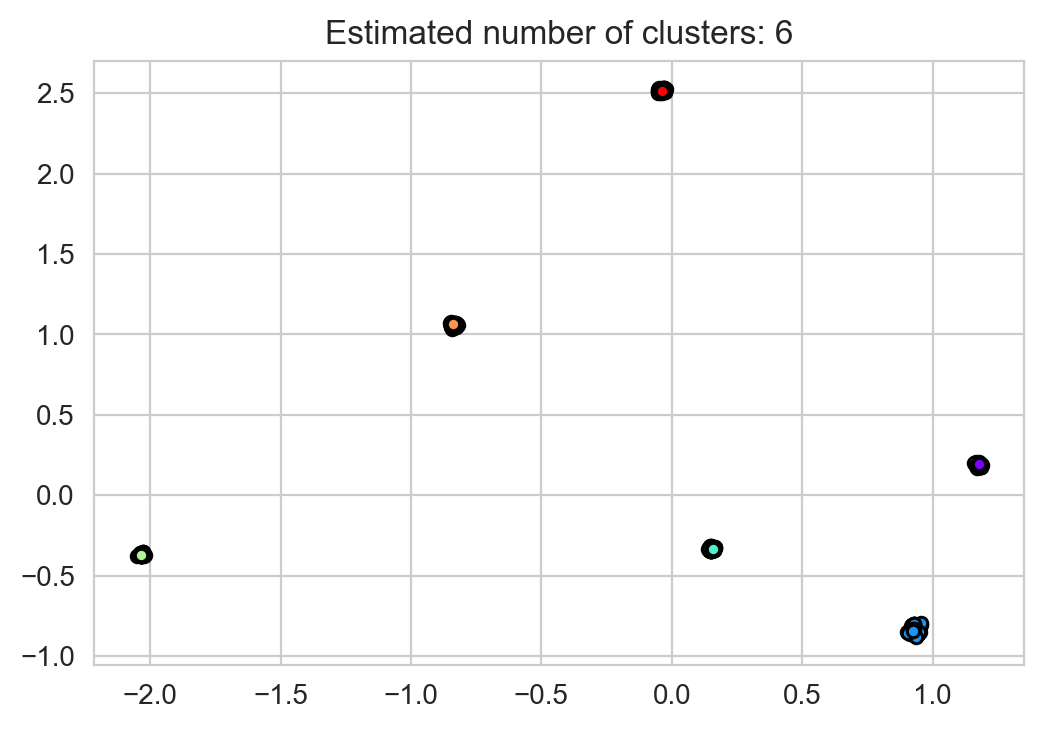

In [60]:
cluster([df])

#### Cluster for hotels location in each country

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

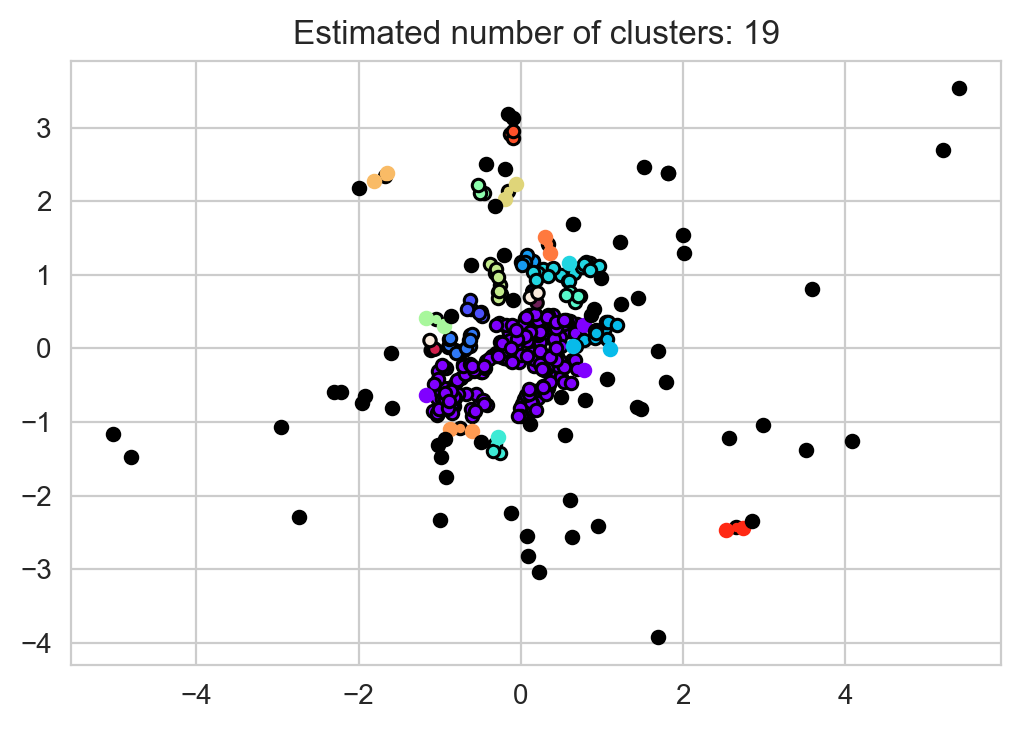

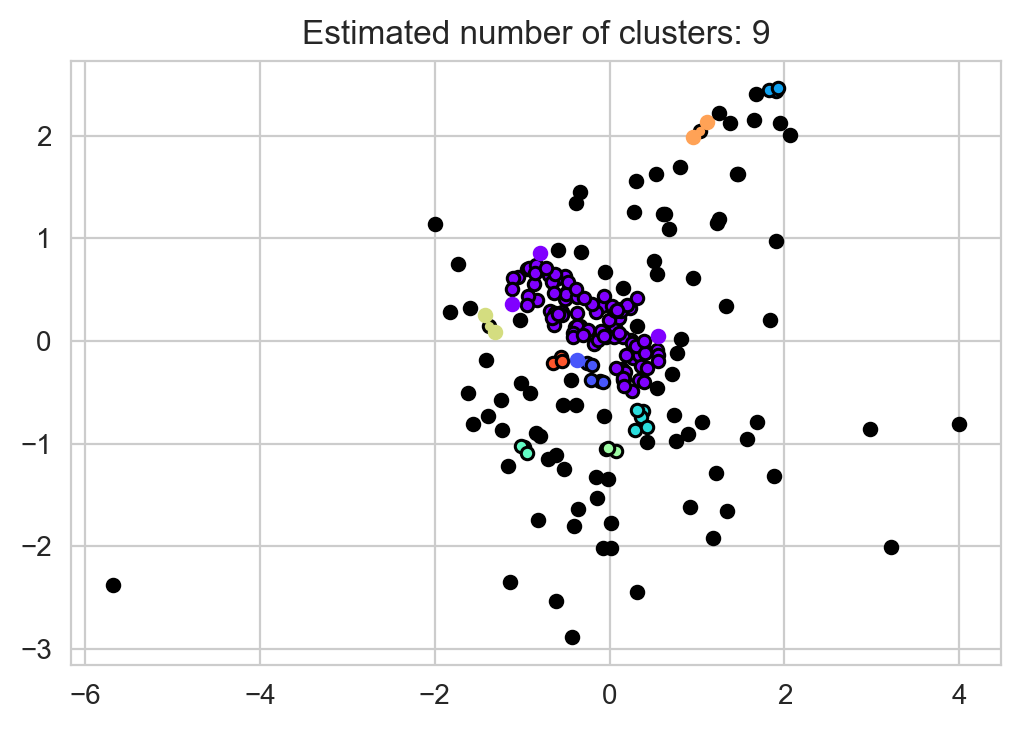

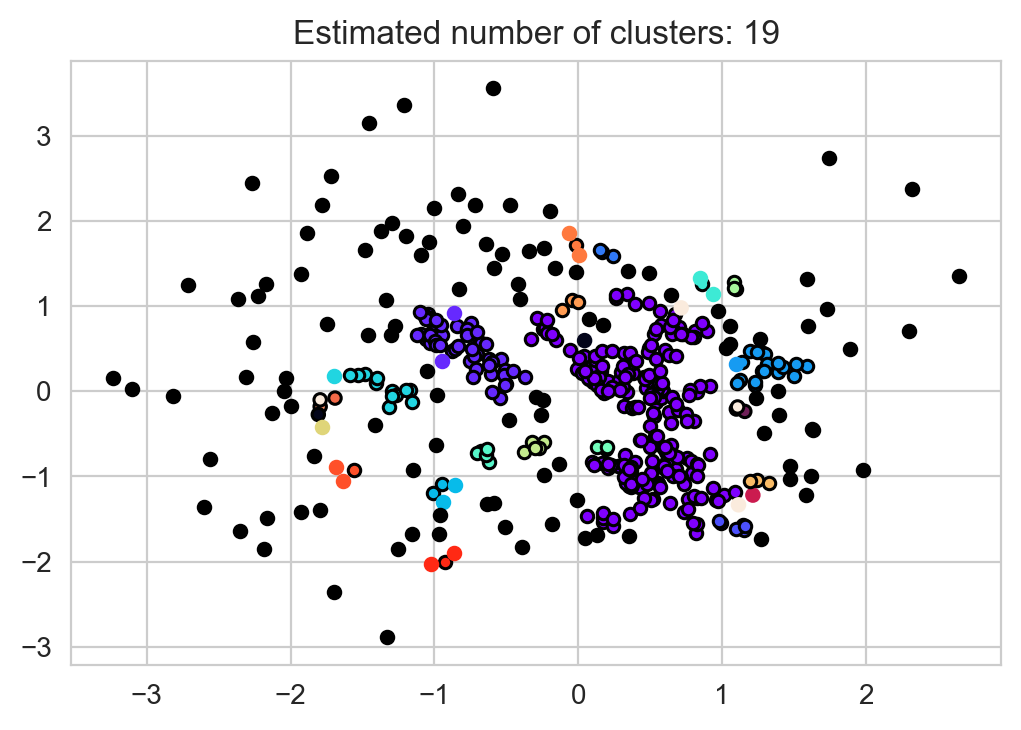

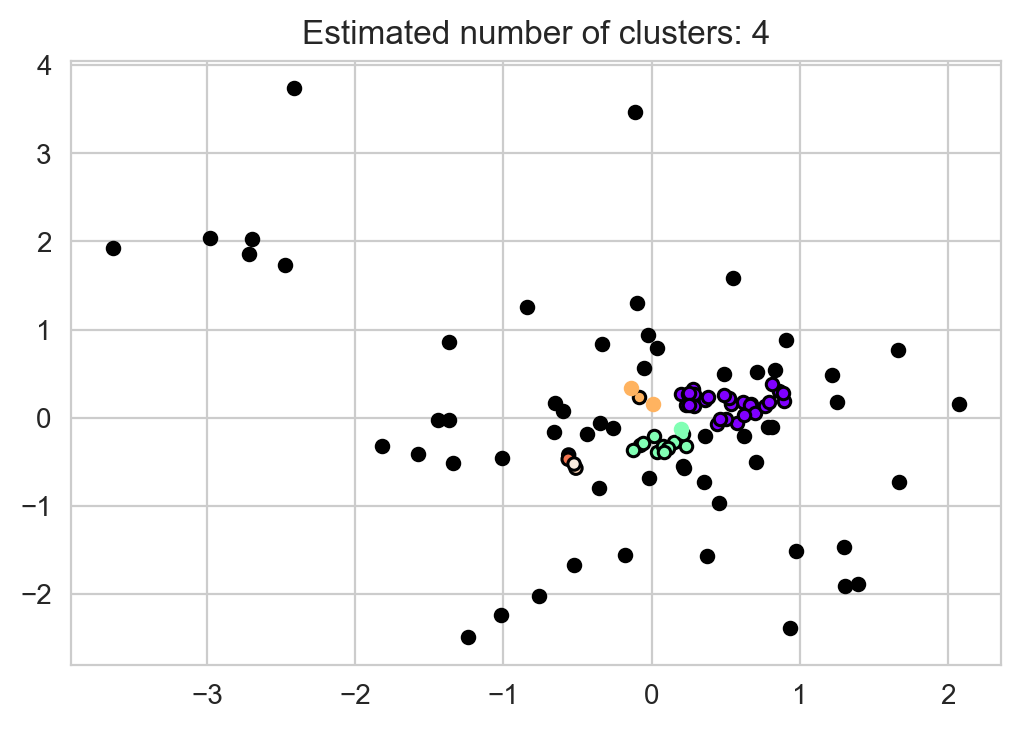

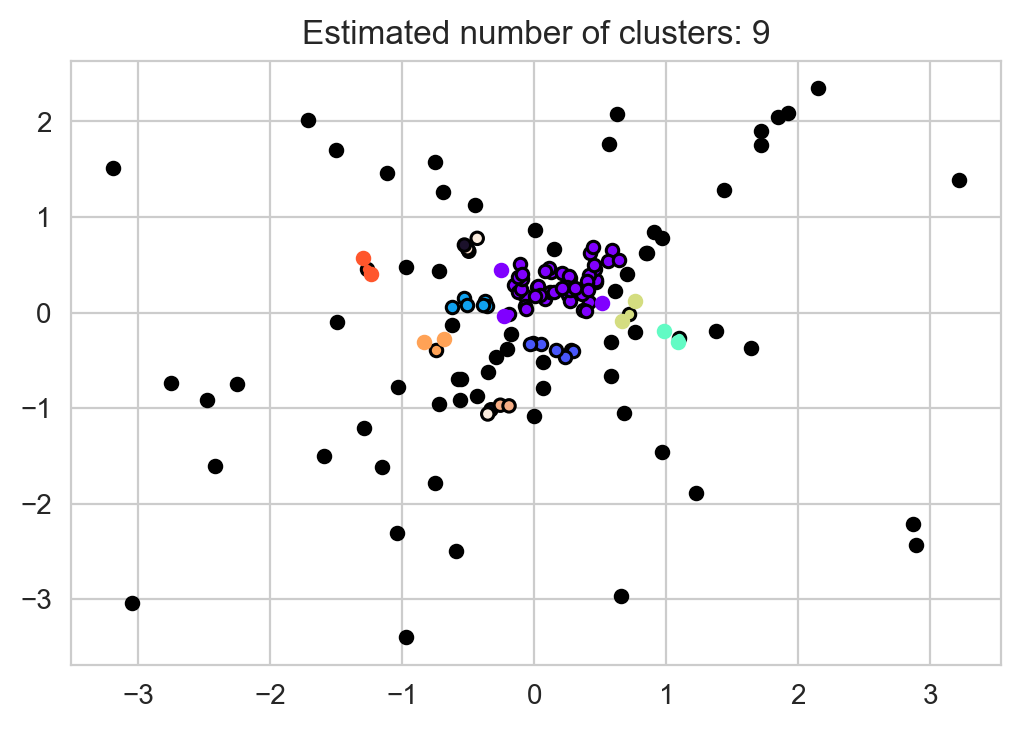

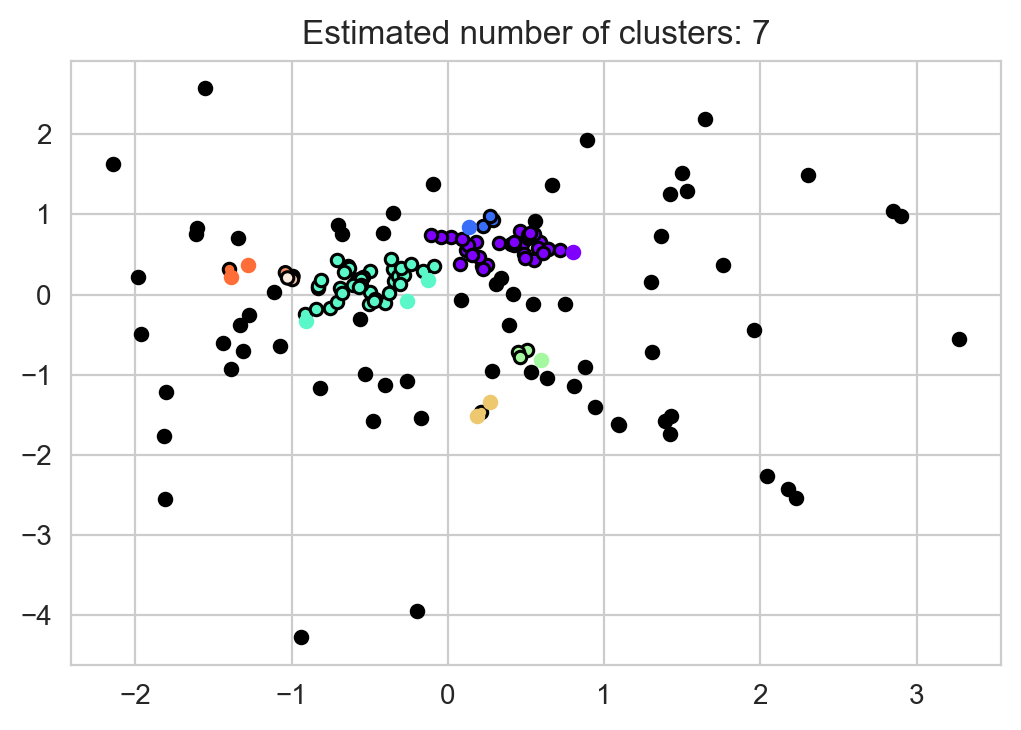

In [61]:
cluster(list_of_country_df);

## SVD Recommndation System

In [62]:
df_recommand = data_sample

In [63]:
df_reco = df[["Reviewer_Nationality" , "Hotel_Name" , "Reviewer_Score","Country"]]
df_reco

,Reviewer_Nationality,Hotel_Name,Reviewer_Score,Country
0,Russia,Hotel Arena,2.9,Netherlands
1,Ireland,Hotel Arena,7.5,Netherlands
2,Australia,Hotel Arena,7.1,Netherlands
3,United Kingdom,Hotel Arena,3.8,Netherlands
4,New Zealand,Hotel Arena,6.7,Netherlands
...,...,...,...,...
515733,Kuwait,Atlantis Hotel Vienna,7.0,Austria
515734,Estonia,Atlantis Hotel Vienna,5.8,Austria
515735,Egypt,Atlantis Hotel Vienna,2.5,Austria
515736,Mexico,Atlantis Hotel Vienna,8.8,Austria


In [64]:
df_reco = df_reco[df_reco["Reviewer_Nationality"] != " "]
df_reco.Reviewer_Nationality = df_reco.Reviewer_Nationality.str.strip()

In [65]:
df_reco['Country'].value_counts().index

Index(['United Kingdom', 'Spain', 'France', 'Netherlands', 'Austria', 'Italy'], dtype='object')

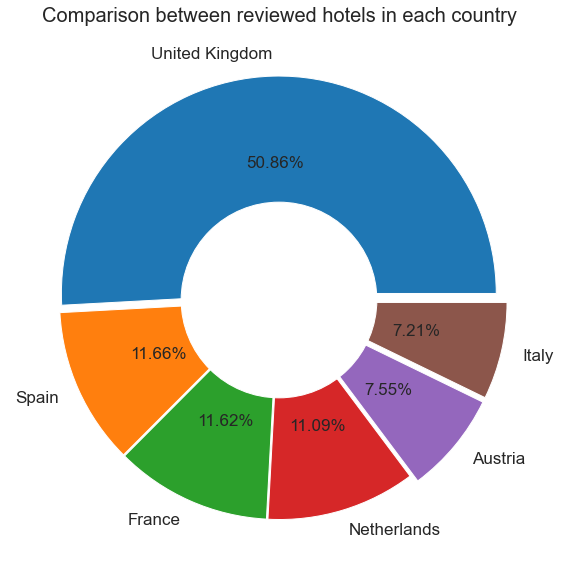

In [66]:
plt.figure(figsize=(10,10))
plt.pie(x=df_reco['Country'].value_counts(),labels=list(df_reco['Country'].value_counts().index)
        ,autopct='%.2f%%',textprops={'fontsize': 17},explode=[0.03,0.01,0.01,0.01,0.05,0.05])
plt.title('Comparison between reviewed hotels in each country',fontdict={'fontsize':20})

centre_circle = plt.Circle((0,0),0.45,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)



plt.show()


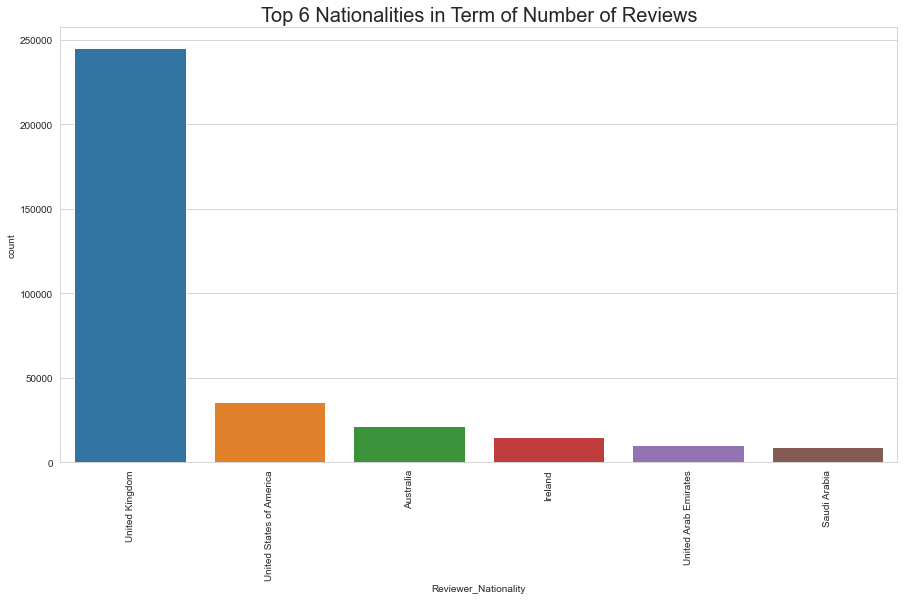

In [67]:
df_top_6 = df_reco[(df_reco['Reviewer_Nationality'] == "United Kingdom") | (df_reco['Reviewer_Nationality'] == "United States of America") |(df_reco['Reviewer_Nationality'] == "Australia") | (df_reco['Reviewer_Nationality'] == "Ireland") |(df_reco['Reviewer_Nationality'] == "United Arab Emirates") | (df_reco['Reviewer_Nationality'] == "Saudi Arabia")]
plt.figure(figsize=(15,8))
sns.countplot(x='Reviewer_Nationality',data=df_top_6 ,order = df_top_6['Reviewer_Nationality'].value_counts().index)
plt.title('Top 6 Nationalities in Term of Number of Reviews',fontdict={'fontsize':20})
plt.xticks(rotation=90);

In [68]:
df_high_all = df_reco[(df_reco["Reviewer_Score"] >= 8)]
df_high_all

,Reviewer_Nationality,Hotel_Name,Reviewer_Score,Country
7,United Kingdom,Hotel Arena,10.0,Netherlands
10,United Kingdom,Hotel Arena,10.0,Netherlands
13,Italy,Hotel Arena,9.2,Netherlands
14,Canada,Hotel Arena,8.8,Netherlands
15,Italy,Hotel Arena,10.0,Netherlands
...,...,...,...,...
515724,India,Atlantis Hotel Vienna,8.3,Austria
515729,Brazil,Atlantis Hotel Vienna,10.0,Austria
515732,Kuwait,Atlantis Hotel Vienna,10.0,Austria
515736,Mexico,Atlantis Hotel Vienna,8.8,Austria


In [69]:
df_reco['Country'].value_counts().index

Index(['United Kingdom', 'Spain', 'France', 'Netherlands', 'Austria', 'Italy'], dtype='object')

In [70]:
list_of_country_df = []
for i in range(len(df_reco['Country'].value_counts().index)):
    list_of_country_df.append(df_high_all[(df_high_all["Country"] == df_reco['Country'].value_counts().index[i])])
    list_of_country_df[i] = list_of_country_df[i][["Reviewer_Nationality" , "Hotel_Name"]]
    list_of_country_df[i] = pd.get_dummies(list_of_country_df[i] , columns =["Hotel_Name"])
    list_of_country_df[i] = list_of_country_df[i].drop_duplicates()
    list_of_country_df[i] = list_of_country_df[i].groupby("Reviewer_Nationality").sum()

In [71]:
def plot_3D_reco(df):
    U, Sigma, VT = svd(df)
    plt.style.use('seaborn')

    fig = plt.figure(figsize=(20,16))
    ax = fig.gca(projection='3d')
    ax.scatter(U[:,0],U[:,1],U[:,2],c='k',s=150);
    ax.set_xlabel("D1", fontsize=20, labelpad=20)
    ax.set_ylabel("D2", fontsize=20, labelpad=20)
    ax.set_zlabel("D3", fontsize=20, labelpad=20);

    lbls = df.index
    offset = 0.02
    for i, txt in enumerate(lbls):
        if i not in [6,7]:
            ax.text(U[i,0]+offset,U[i,1],U[i,2],txt, fontsize=20)
        else:
            ax.text(U[i,0]+offset,U[i,1],U[i,2]+5*offset,txt, fontsize=20)

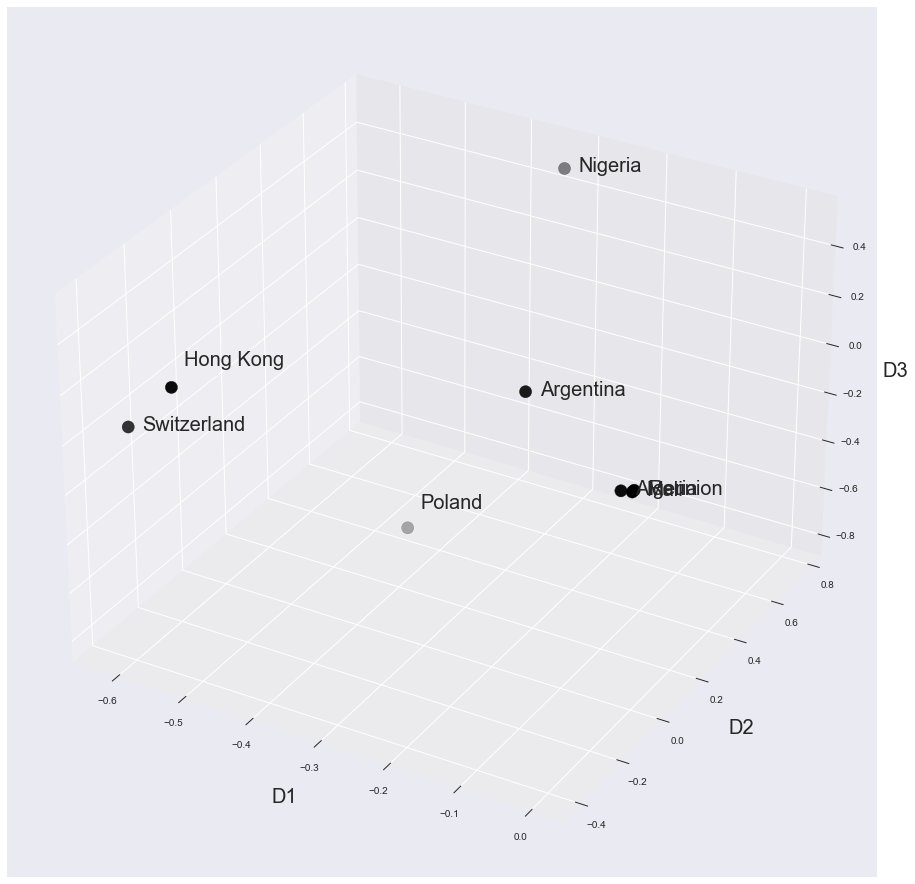

In [72]:
plot_3D_reco(list_of_country_df[0].sample(8))
# اشوف لها حل لازم 

In [73]:
def get_recommends_user(userID, df ,Nationalities , Hotels):
    U, Sigma, VT = svd(df)
    userrecs = []
    for user in range(U.shape[0]):
        if user!= userID:
            userrecs.append([user,np.dot(U[userID],U[user])])
    final_rec = [i[0] for i in sorted(userrecs,key=lambda x: x[1],reverse=True)]
    comp_user = final_rec[0]
    print("Users from %s are most similar to users from %s."% (User_Nationality_list[userID], User_Nationality_list[comp_user]))
    rec_likes = df.iloc[comp_user]
    current = df.iloc[userID]
    recs = []
    for i,item in enumerate(current):
        if item != rec_likes[i] and rec_likes[i]!=0:
            recs.append(i)
    return recs

In [74]:
user_nation = 'Saudi Arabia'
#user_nation = input("Enter Country Name ")
print("=========People from %s========= "%user_nation )

i = 0
for df in list_of_country_df:
    print("\n\n===Recommended hotels in %s==="%df_reco['Country'].value_counts().index[i])
    User_Nationality_list = df.index
    Hotel_names_list = df.columns.str.replace("Hotel_Name_", "")
    user_nation_index = list(df.index).index(user_nation)
    recommended_hotels = get_recommends_user(user_nation_index,df,
                                             User_Nationality_list,Hotel_names_list)


    if len(recommended_hotels) > 10:
        recommended_hotels_first_10 = recommended_hotels[0:10]
    else:
        recommended_hotels_first_10 = recommended_hotels

    print("There are %s hotels that people from %s did not visit, they might like" % (len(recommended_hotels) ,
                                                                                      User_Nationality_list[user_nation_index]))
    print("\n%s Hotels for people from %s to check out:\n "% (len(recommended_hotels_first_10) ,
                                                              User_Nationality_list[user_nation_index]),
                                                            list(Hotel_names_list[recommended_hotels_first_10]))
    i+=1

=========People from Saudi Arabia========= 


===Recommended hotels in United Kingdom===
Users from Saudi Arabia are most similar to users from Estonia.
There are 17 hotels that people from Saudi Arabia did not visit, they might like

10 Hotels for people from Saudi Arabia to check out:
  ['Andaz London Liverpool Street', 'Canary Riverside Plaza Hotel', 'Chiswick Rooms', 'DoubleTree By Hilton London Excel', 'DoubleTree by Hilton London Islington', 'Goodenough Club', 'Grange Fitzrovia Hotel', 'Grange Wellington Hotel', 'Holiday Inn London Oxford Circus', 'Holiday Inn London Whitechapel']


===Recommended hotels in Spain===
Users from Saudi Arabia are most similar to users from Mauritius.
There are 1 hotels that people from Saudi Arabia did not visit, they might like

1 Hotels for people from Saudi Arabia to check out:
  ['Hotel Granados 83']


===Recommended hotels in France===
Users from Saudi Arabia are most similar to users from Philippines.
There are 28 hotels that people from Saudi

## Recommndation System

In [75]:
recom_data = df_recommand[df_recommand['Reviewer_Score'] >= 8]
recom_data = recom_data[['Reviewer_Nationality','Hotel_Name']]
recom_data.drop_duplicates(inplace=True)
recom_data.Reviewer_Nationality = recom_data.Reviewer_Nationality.str.strip()

In [76]:
recom_data = recom_data[recom_data['Reviewer_Nationality'] != 'United Kingdom']
recom_data = recom_data[recom_data['Reviewer_Nationality'] != 'United States of America']
recom_data = recom_data[recom_data['Reviewer_Nationality'] != 'Australia']
recom_data = recom_data[recom_data['Reviewer_Nationality'] != 'Ireland']

In [77]:
user_hotel_map = defaultdict(list)
hotel_user_map = defaultdict(list)

In [78]:
data_recom = pd.DataFrame(recom_data)
data_recom.to_csv(r'data_rec.csv', index=False)

In [79]:
with open('data_rec.csv', 'r') as csvfile:
    w = csv.reader(csvfile)
    for row in w:
        user_hotel_map[row[0]].append(row[1])
        hotel_user_map[row[1]].append(row[0])

In [80]:
def get_similar_hotel(user_hotel_map,hotel_user_map,m):
    biglist = []
    for u in hotel_user_map[m]: 
        biglist.extend(user_hotel_map[u])
    return Counter(biglist).most_common(4)[1:]

In [81]:
def get_hotel_recommendation(user_hotel_map,hotel_user_map,u1):
    biglist = []
    for m in user_hotel_map[u1]: 
        for u in hotel_user_map[m]: 
            biglist.extend(user_hotel_map[u]) 
    return Counter(biglist).most_common(3) 

In [82]:
def get_similar_users(user_hotel_map,hotel_user_map,m):
    hotel_user_map
    user_hotel_map
    biglist = []
    for u in user_hotel_map[m]: 
        biglist.extend(hotel_user_map[u]) 
    return Counter(biglist).most_common(4)[1:]

In [83]:
get_similar_hotel(user_hotel_map,hotel_user_map,'The Kensington Hotel')

[('Park Grand Paddington Court', 12),
 ('Park Plaza Westminster Bridge London', 11),
 ('Best Western Premier Hotel Couture', 11)]

In [84]:
get_hotel_recommendation(user_hotel_map,hotel_user_map,'Saudi Arabia')

[('Park Plaza Westminster Bridge London', 6784),
 ('The Student Hotel Amsterdam City', 6662),
 ('Best Western Premier Hotel Couture', 6582)]

In [85]:
country = 'Kuwait'
get_similar_users(user_hotel_map,hotel_user_map,country)

[('United Arab Emirates', 217), ('Saudi Arabia', 207), ('Canada', 176)]

## Modeling

In [86]:
def get_scores(model,X_train,X_val):
    model.fit(X_train,y_train)
    print(f'Traing score: {model.score(X_train,y_train)}')
    print(f'Val score:    {model.score(X_val,y_val)}')
    print( f"F1 score:    {f1_score(model.predict(X_val),y_val)}")
    print(f'Precision score: {precision_score(y_val,model.predict(X_val))}')
    print(f'Recall score: {recall_score(y_val,model.predict(X_val))}')
    print(f'accuracy score: {accuracy_score(y_val, model.predict(X_val))}')

In [87]:
X = data_sample.Review
y = data_sample.Sentiment

In [88]:
from sklearn.model_selection import train_test_split
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.05 , random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.0534, random_state=42)

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer()

X_train_cv1 = cv1.fit_transform(X_train)
X_val_cv1  = cv1.transform(X_val)

In [90]:
lr = LogisticRegression()
get_scores(lr,X_train_cv1,X_val_cv1)

Traing score: 0.9525948825158184
Val score:    0.9414547604967475
F1 score:    0.9462443438914028
Precision score: 0.9477882523567803
Recall score: 0.9447054571738345
accuracy score: 0.9414547604967475


In [91]:
bnb = BernoulliNB()
get_scores(bnb,X_train_cv1,X_val_cv1)

Traing score: 0.8894770202497582
Val score:    0.8771929824561403
F1 score:    0.8933036478849118
Precision score: 0.8489583333333334
Recall score: 0.9425370437296712
accuracy score: 0.8771929824561403


In [92]:
DTC = DecisionTreeClassifier()
get_scores(DTC,X_train_cv1,X_val_cv1)

Traing score: 0.9910149343356278
Val score:    0.9075497733096787
F1 score:    0.9149900308138481
Precision score: 0.9178181818181819
Recall score: 0.9121792555113841
accuracy score: 0.9075497733096787


In [93]:
tfidf1 = TfidfVectorizer()

X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_val_tfidf1  = tfidf1.transform(X_val)
get_scores(lr,X_train_tfidf1,X_val_tfidf1)

Traing score: 0.9487695575299966
Val score:    0.9428346146264538
F1 score:    0.9471766848816029
Precision score: 0.9548292324641939
Recall score: 0.93964582580412
accuracy score: 0.9428346146264538


In [94]:
bnb = BernoulliNB()
get_scores(bnb,X_train_tfidf1,X_val_tfidf1) 

Traing score: 0.8894770202497582
Val score:    0.8771929824561403
F1 score:    0.8933036478849118
Precision score: 0.8489583333333334
Recall score: 0.9425370437296712
accuracy score: 0.8771929824561403


In [95]:
DTC = DecisionTreeClassifier()
get_scores(DTC,X_train_tfidf1,X_val_tfidf1)

Traing score: 0.9910149343356278
Val score:    0.9065641632170314
F1 score:    0.9139120958953869
Precision score: 0.918583424607521
Recall score: 0.909288037585833
accuracy score: 0.9065641632170314


## Final model

In [96]:
model = LogisticRegression()
tfidf1 = TfidfVectorizer()
X_train_val_tfidf1 = tfidf1.fit_transform(X_train_val)
X_test_tfidf1  = tfidf1.transform(X_test)
model.fit(X_train_val_tfidf1 ,y_train_val)
print(f'Traing score: {model.score(X_train_val_tfidf1,y_train_val)}')
print(f'Val score:    {model.score(X_test_tfidf1,y_test)}')
print( f"F1 score:    {f1_score(model.predict(X_test_tfidf1),y_test)}")
print(f'Precision score: {precision_score(y_test,model.predict(X_test_tfidf1))}')
print(f'Recall score: {recall_score(y_test,model.predict(X_test_tfidf1))}')
print(f'accuracy score: {accuracy_score(y_test, model.predict(X_test_tfidf1))}')

Traing score: 0.9488947368421052
Val score:    0.9428
F1 score:    0.9471739933505726
Precision score: 0.9577885692939858
Recall score: 0.9367921081476068
accuracy score: 0.9428
